# Alibi Jangeldin HW1 ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt

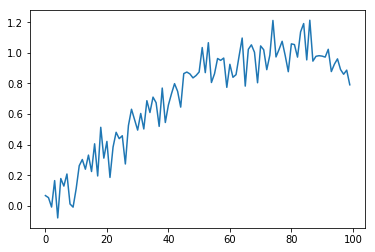

In [3]:
#data generation, 100 points from sinusiod function
mu, sigma = 0, 0.1
noise = np.random.normal(mu, sigma, 100)
X_init = np.arange(0, 2, 0.02)
amplitude = np.sin(X_init)
X_init = X_init.reshape(len(X_init), 1)
Y = amplitude+noise
Y = Y.reshape(len(X_init), 1)

plt.plot(Y)
plt.show()

In [16]:
#n+1 order polynomial basis function, 3rd order was the best suit for our problem above
n=2
X = np.hstack((np.ones((len(Y), 1)), X_init))
for i in range(n):
    X = np.hstack((X, pow(X_init, i+2)))

In [17]:
#random train/test split 80/20
randomize = np.arange(len(Y))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]
X_train=X[:80]
X_test=X[:-80]
Y_train=Y[:80]
Y_test=Y[:-80]

In [18]:
def check_test_fit(weights):
    plt.plot(X_test.dot(weights))
    plt.plot(Y_test)

In [19]:
def cost_func(weights, x, y):
    m=len(y)
    J=1/2/m*np.sum((x.dot(weights)-y)**2)
    return J

In [49]:
#1 Batch gradient descent
def batch(train_x, train_y, train_w, lr=0.05, iters=2000):
    cost_hist=np.zeros(iters)
    m=len(train_y)
    for i in range(iters):
        preds=train_x.dot(train_w)
        loss=preds-train_y
        gradient=np.dot(train_x.T, loss) / m
        train_w = train_w-lr * gradient
        cost_hist[i]=cost_func(train_w, train_x, train_y)
    return train_w, cost_hist

[[ 0.74160588]
 [-0.46147347]
 [ 0.47970028]
 [-0.12063012]]
0.0508821452059


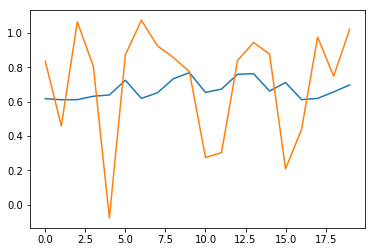

In [50]:
w=np.random.randn(n+2, 1)
w_batch, cost_history = batch(X_train, Y_train, w)
check_test_fit(w_batch)
print(w_batch)
print(cost_func(w_batch, X_test, Y_test))
plt.show()

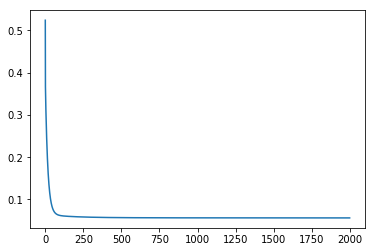

In [51]:
plt.plot(cost_history)
plt.show()

In [56]:
#2 Stochastic gradient descent
def sgd(train_x, train_y, train_w, lr=0.5, iters=2000):
    cost_hist=np.zeros(iters)
    m=len(train_y)
    for i in range(iters):
        index=np.random.randint(0, m)
        new_x=train_x[index,:].reshape(1, train_x.shape[1])
        new_y=train_y[index,:].reshape(1, 1)
        preds=new_x.dot(train_w)
        loss=preds-new_y
        gradient=np.dot(new_x.T, loss) / m
        train_w = train_w-lr * gradient
        cost_hist[i]=cost_func(train_w, new_x, new_y)
    return train_w, cost_hist

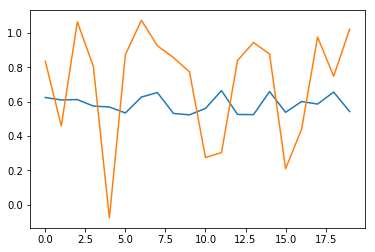

[[ 0.69113095]
 [-0.15279329]
 [ 0.02681463]
 [ 0.0037437 ]]
0.0592480948559


In [57]:
w = np.random.randn(n+2, 1)
w_sgd, cost_history = sgd(X_train, Y_train, w)
check_test_fit(w_sgd)
plt.show()
print(w_sgd)
print(cost_func(w_sgd, X_test, Y_test))

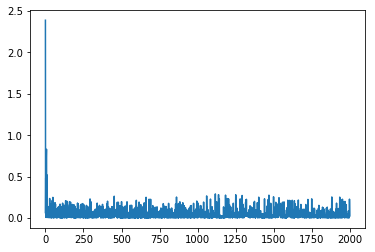

In [58]:
plt.plot(cost_history)
plt.show()

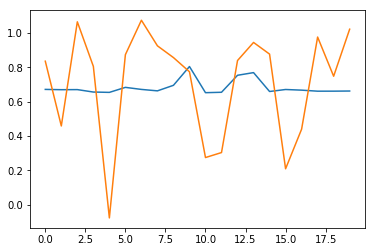

[[ 0.62275884]
 [ 0.23643278]
 [-0.35055218]
 [ 0.14557985]]
0.0484663212456


In [59]:
#3 Maximum likelihood estimation
w_MLE=np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)
check_test_fit(w_MLE)
plt.show()
print(w_MLE)
print(cost_func(w_MLE, X_test, Y_test))

MLE has the best perfomance according to the test set in this particular experiment, but the test set error is not significantly higher than in other methods. When I tried to experiment with different functions and different polynomial bases there was no clear winner between these methods. Weights and plots of predicted versus actual values are similar to each other.  Probably it is due to inherent randomness in the test set.